## Einsatz des Naive Bayes Classifier zur Extraktion der Top 10 Keywords pro Sterne-Klasse

Also Basis des Notebooks wurde folgendes Videotutorial genommen: https://www.youtube.com/watch?v=5xDE06RRMFk

In [30]:
import json as j
import pandas as pd
import re
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2, SelectPercentile
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

In [31]:
data = pd.read_csv("./Data_filtered/reviews_Musical_Instruments.csv", sep=";")
data.head()

,review,rating
0,"['much', 'write', 'exactly', 'supposed', 'filt...",5.0
1,"['product', 'exactly', 'quite', 'affordablei',...",5.0
2,"['primary', 'job', 'device', 'block', 'breath'...",5.0
3,"['nice', 'windscreen', 'protects', 'mxl', 'mic...",5.0
4,"['pop', 'filter', 'great', 'looks', 'performs'...",5.0


In [32]:
X_train, X_test, y_train, y_test = train_test_split(data['review'], data['rating'], test_size=0.2)

pipeline = Pipeline([('vect', TfidfVectorizer(ngram_range=(1, 2), stop_words="english", sublinear_tf=True)),
                     ('chi', SelectKBest(chi2, k=10000)), 
                     ('clf', MultinomialNB(alpha=1))])
# ('chi', SelectPercentile(percentile=10)), # wählt 10% mit dem Höchsten vorkommen
# ('clf', LinearSVC(C=1.0, penalty= "l1", max_iter=3000, dual=False))]) # Linear SVM Classifier aus dem Tutorium

In [33]:
model = pipeline.fit(X_train, y_train)

vectorizer = model.named_steps['vect']
chi = model.named_steps['chi']
clf = model.named_steps['clf']

feature_names = vectorizer.get_feature_names()
feature_names = [feature_names[i] for i in chi.get_support(indices=True)]
feature_names = np.asarray(feature_names)

target_names = ['1', '2', '3', '4', '5']
print("top 10 keywords per class:")
for i, label in enumerate(target_names):
    top10 = np.argsort(clf.coef_[i])[-10:]
    print("%s: %s" % (label, " ".join(feature_names[top10])))

print("accuracy score: " + str(model.score(X_test, y_test)))

print(model.predict(['that was an awesome place. Great food!']))

top 10 keywords per class:
1: guess crap useless maybe junk received defective returned bad cheap
2: fine broke decent ok little returned great bad thought cheap
3: stars easy thought fine bad great bit cheap ok little
4: works fine perfect best stars cheap easy bit fine little great
5: bit cheap highly works great perfect best little love easy great
accuracy score: 0.6522162688748173
[5.]


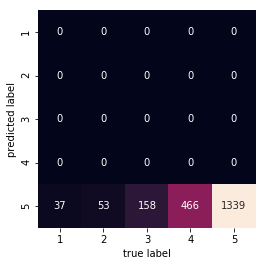

In [34]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

labels = model.predict(X_test)
target_names = ['1', '2', '3', '4', '5']
mat = confusion_matrix(y_test, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=target_names, yticklabels=target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [35]:
print(model.predict(['broke']))

[5.]
